<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap08/8_4_High_Dimensional_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 8.4: High-dimensional spaces**

This notebook investigates the strange properties of high-dimensional spaces as discussed in the notes at the end of chapter 8.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Импорт необходимых библиотек
import numpy as np  # NumPy для работы с массивами и математическими операциями
import matplotlib.pyplot as plt  # Matplotlib для построения графиков
import scipy.special as sci  # Специальные функции SciPy (например, гамма-функция)
from scipy.spatial.distance import pdist  # Функция для вычисления попарных расстояний между точками

# How close are points in high dimensions?

In this part of the notebook, we investigate how close random points are in 2D, 100D, and 1000D.   In each case, we generate 1000 points and calculate the Euclidean distance between each pair.  

In [2]:
# Фиксируем seed для воспроизводимости результатов
np.random.seed(0)
n_data = 1000  # Количество точек данных

# Создаем 1000 точек в 2D пространстве
# Каждая точка - это столбец матрицы, каждая размерность - строка
n_dim = 2
x_2D = np.random.normal(size=(n_dim, n_data))  # Матрица размером (2, 1000)

# Создаем 1000 точек в 100D пространстве
n_dim = 100
x_100D = np.random.normal(size=(n_dim, n_data))  # Матрица размером (100, 1000)

# Создаем 1000 точек в 1000D пространстве
n_dim = 1000
x_1000D = np.random.normal(size=(n_dim, n_data))  # Матрица размером (1000, 1000)

In [3]:
def distance_ratio(x):
    """
    Вычисляет отношение максимального расстояния к минимальному между всеми парами точек.
    
    Параметры:
    x - матрица, где столбцы представляют точки данных, а строки - размерности
    
    Возвращает:
    Отношение максимального расстояния к минимальному
    """
    # Вычисляем все попарные евклидовы расстояния между точками
    # pdist ожидает, что каждая строка - это отдельная точка, поэтому транспонируем x
    # pdist автоматически исключает расстояние от точки до самой себя (которое равно 0)
    distances = pdist(x.T)  # x.T потому что pdist ожидает точки в строках, а у нас они в столбцах
    
    # Находим минимальное и максимальное расстояние
    smallest_dist = np.min(distances)  # Минимальное расстояние между двумя точками
    largest_dist = np.max(distances)   # Максимальное расстояние между двумя точками

    # Вычисляем отношение максимального к минимальному и возвращаем
    dist_ratio = largest_dist / smallest_dist
    return dist_ratio

In [4]:
# Выводим отношение максимального к минимальному расстоянию для разных размерностей
# В высоких размерностях это отношение стремится к 1 (все точки примерно одинаково удалены друг от друга)
print("Отношение максимального к минимальному расстоянию в 2D: %3.3f" % (distance_ratio(x_2D)))
print("Отношение максимального к минимальному расстоянию в 100D: %3.3f" % (distance_ratio(x_100D)))
print("Отношение максимального к минимальному расстоянию в 1000D: %3.3f" % (distance_ratio(x_1000D)))

Отношение максимального к минимальному расстоянию в 2D: 2840.258
Отношение максимального к минимальному расстоянию в 100D: 2.038
Отношение максимального к минимальному расстоянию в 1000D: 1.221


If you did this right, you will see that the distance between the nearest and farthest two points in high dimensions is almost the same.  

# Volume of a hypersphere

In the second part of this notebook we calculate the volume of a hypersphere of radius 0.5 (i.e., of diameter 1) as a function of the radius.  Note that you can check your answer by doing the calculation for 2D using the standard formula for the area of a circle and making sure it matches.

In [5]:
def volume_of_hypersphere(diameter, dimensions):
    """
    Вычисляет объем гиперсферы заданного диаметра в заданном количестве размерностей.
    
    Формула: V_d(r) = (π^(d/2) / Γ(d/2 + 1)) * r^d
    где d - количество размерностей, r - радиус, Γ - гамма-функция
    
    Параметры:
    diameter - диаметр гиперсферы
    dimensions - количество размерностей
    
    Возвращает:
    Объем гиперсферы
    """
    # Используем значение π из NumPy
    pi = np.pi
    
    # Вычисляем радиус из диаметра
    radius = diameter / 2.0
    
    # Применяем формулу объема гиперсферы:
    # V = (π^(d/2) / Γ(d/2 + 1)) * r^d
    # где Γ - гамма-функция, которая обобщает факториал
    volume = (pi ** (dimensions / 2.0) / sci.gamma(dimensions / 2.0 + 1)) * (radius ** dimensions)

    return volume

In [6]:
# Вычисляем объем гиперсферы единичного диаметра для размерностей от 1 до 10
# В высоких размерностях объем стремится к нулю
diameter = 1.0  # Единичный диаметр
for c_dim in range(1, 11):  # Перебираем размерности от 1 до 10
    print(
        "Объем гиперсферы единичного диаметра в %d размерностях равен %3.3f"
        % (c_dim, volume_of_hypersphere(diameter, c_dim))
    )

Объем гиперсферы единичного диаметра в 1 размерностях равен 1.000
Объем гиперсферы единичного диаметра в 2 размерностях равен 0.785
Объем гиперсферы единичного диаметра в 3 размерностях равен 0.524
Объем гиперсферы единичного диаметра в 4 размерностях равен 0.308
Объем гиперсферы единичного диаметра в 5 размерностях равен 0.164
Объем гиперсферы единичного диаметра в 6 размерностях равен 0.081
Объем гиперсферы единичного диаметра в 7 размерностях равен 0.037
Объем гиперсферы единичного диаметра в 8 размерностях равен 0.016
Объем гиперсферы единичного диаметра в 9 размерностях равен 0.006
Объем гиперсферы единичного диаметра в 10 размерностях равен 0.002


You should see that the volume decreases to almost nothing in high dimensions.  All of the volume is in the corners of the unit hypercube (which always has volume 1).

# Proportion of hypersphere in outer shell

In the third part of the notebook you will calculate what proportion of the volume of a hypersphere is in the outer 1% of the radius/diameter.  Calculate the volume of a hypersphere and then the volume of a hypersphere with 0.99 of the radius and then figure out the ratio.  

In [7]:
def get_prop_of_volume_in_outer_1_percent(dimension):
    """
    Вычисляет долю объема гиперсферы, находящейся в внешнем 1% радиуса (т.е. в "кожуре").
    
    В высоких размерностях большая часть объема концентрируется у поверхности -
    это аналогично тому, что большая часть объема высокомерного апельсина находится в кожуре.
    
    Параметры:
    dimension - количество размерностей
    
    Возвращает:
    Доля объема во внешнем 1% радиуса (от 0 до 1)
    """
    # Вычисляем объем полной гиперсферы (диаметр = 1.0, радиус = 0.5)
    volume_full = volume_of_hypersphere(1.0, dimension)
    
    # Вычисляем объем внутренней гиперсферы с 99% радиуса (диаметр = 0.99, радиус = 0.495)
    # Это гиперсфера, из которой исключен внешний 1% радиуса
    volume_inner = volume_of_hypersphere(0.99, dimension)
    
    # Доля объема во внешнем 1% = 1 - (объем внутренней сферы / объем полной сферы)
    # Это показывает, какая часть объема находится в "кожуре"
    proportion = 1.0 - (volume_inner / volume_full)

    return proportion

# Визуализация концепта "кожуры" гиперсферы

Ниже представлены визуализации, которые помогут лучше понять концепт "кожуры" (внешнего слоя) гиперсферы и как объем распределяется в высоких размерностях.


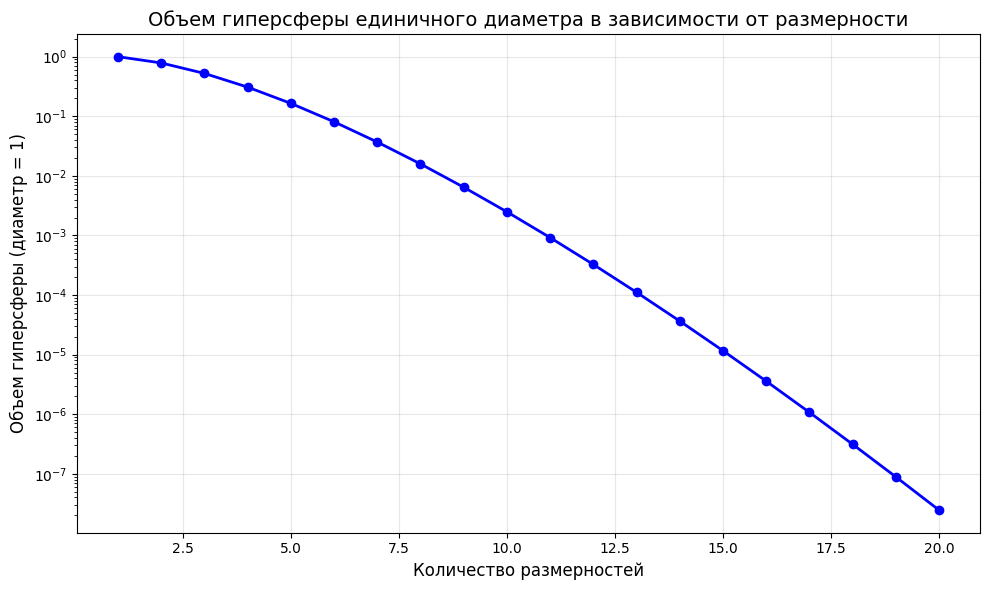

Видно, что объем экспоненциально уменьшается с увеличением размерности!


In [9]:
# Визуализация 1: Объем гиперсферы в зависимости от размерности
dimensions_range = np.arange(1, 21)  # Размерности от 1 до 20
volumes = [volume_of_hypersphere(1.0, d) for d in dimensions_range]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dimensions_range, volumes, 'b-o', linewidth=2, markersize=6)
ax.set_xlabel('Количество размерностей', fontsize=12)
ax.set_ylabel('Объем гиперсферы (диаметр = 1)', fontsize=12)
ax.set_title('Объем гиперсферы единичного диаметра в зависимости от размерности', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_yscale('log')  # Логарифмическая шкала для лучшей видимости
plt.tight_layout()
plt.show()

print("Видно, что объем экспоненциально уменьшается с увеличением размерности!")


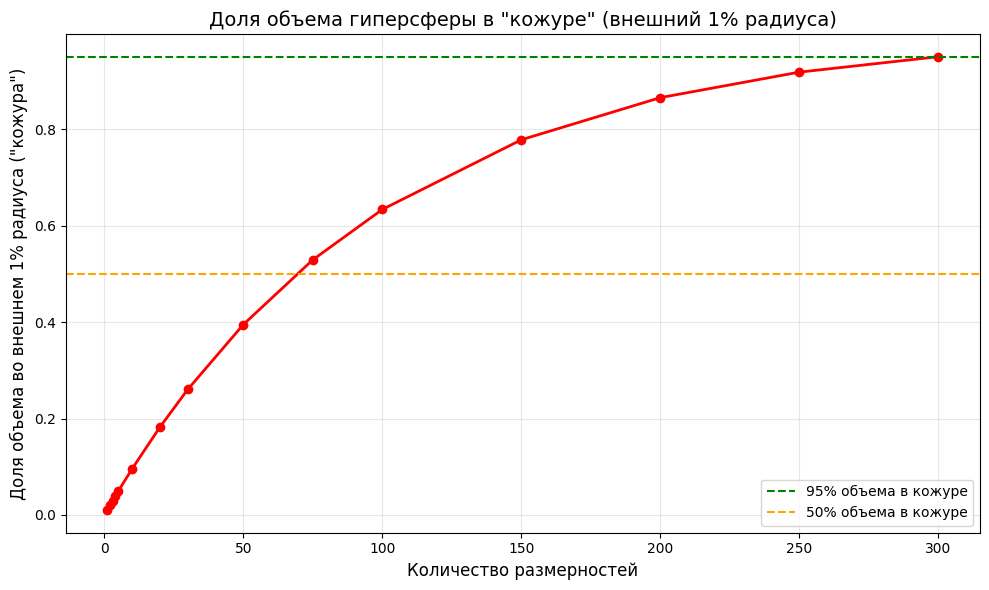

В высоких размерностях почти весь объем концентрируется в тонком внешнем слое!


In [10]:
# Визуализация 2: Доля объема в "кожуре" (внешнем 1% радиуса)
dimensions_shell = [1, 2, 3, 4, 5, 10, 20, 30, 50, 75, 100, 150, 200, 250, 300]
shell_proportions = [get_prop_of_volume_in_outer_1_percent(d) for d in dimensions_shell]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dimensions_shell, shell_proportions, 'r-o', linewidth=2, markersize=6)
ax.axhline(y=0.95, color='g', linestyle='--', linewidth=1.5, label='95% объема в кожуре')
ax.axhline(y=0.50, color='orange', linestyle='--', linewidth=1.5, label='50% объема в кожуре')
ax.set_xlabel('Количество размерностей', fontsize=12)
ax.set_ylabel('Доля объема во внешнем 1% радиуса (\"кожура\")', fontsize=12)
ax.set_title('Доля объема гиперсферы в \"кожуре\" (внешний 1% радиуса)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("В высоких размерностях почти весь объем концентрируется в тонком внешнем слое!")


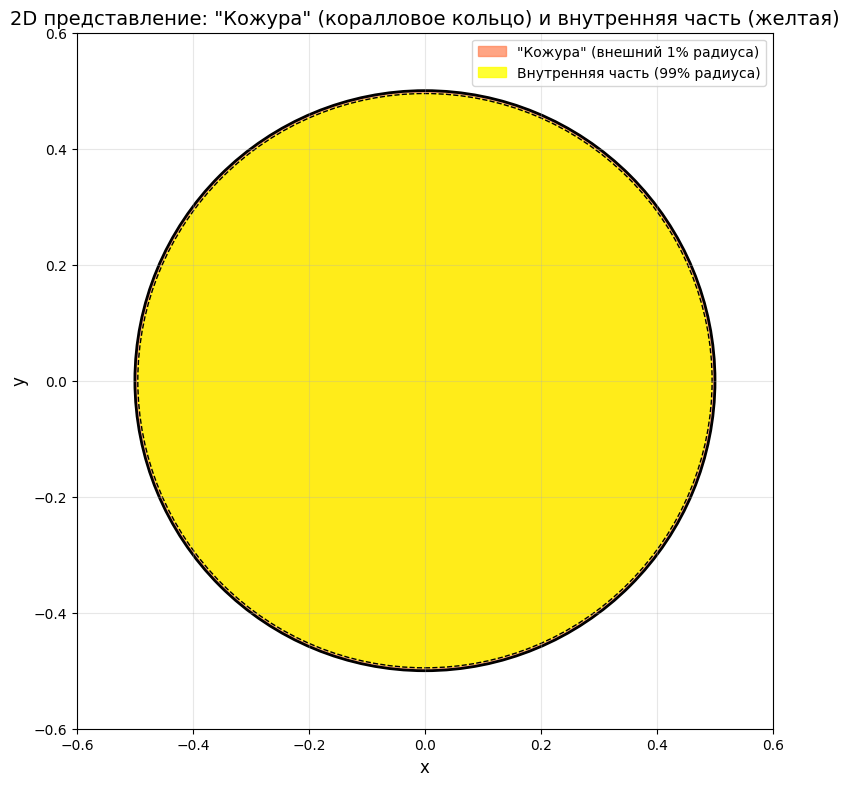

В 2D: 2.0% объема находится в "кожуре" (внешнем 1% радиуса)


In [11]:
# Визуализация 3: 2D представление "кожуры" для круга (2D гиперсфера)
# Показываем полный круг и внутреннюю часть (без кожуры)
from matplotlib.patches import Circle

# Полный круг (радиус = 0.5, диаметр = 1.0)
radius_full = 0.5
# Внутренний круг (99% радиуса - без "кожуры")
radius_inner = 0.5 * 0.99

fig, ax = plt.subplots(figsize=(8, 8))

# Рисуем "кожуру" (красное кольцо) - сначала полный круг
circle_full = Circle((0, 0), radius_full, color='coral', alpha=0.7, label='\"Кожура\" (внешний 1% радиуса)')
ax.add_patch(circle_full)

# Затем рисуем внутренний круг поверх (желтый), создавая эффект кольца
circle_inner = Circle((0, 0), radius_inner, color='yellow', alpha=0.8, label='Внутренняя часть (99% радиуса)')
ax.add_patch(circle_inner)

# Рисуем границы для наглядности
circle_full_edge = Circle((0, 0), radius_full, fill=False, edgecolor='black', linewidth=2)
ax.add_patch(circle_full_edge)
circle_inner_edge = Circle((0, 0), radius_inner, fill=False, edgecolor='black', linewidth=1, linestyle='--')
ax.add_patch(circle_inner_edge)

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_aspect('equal')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('2D представление: \"Кожура\" (коралловое кольцо) и внутренняя часть (желтая)', fontsize=14)
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

prop_2D = get_prop_of_volume_in_outer_1_percent(2)
print(f"В 2D: {prop_2D*100:.1f}% объема находится в \"кожуре\" (внешнем 1% радиуса)")


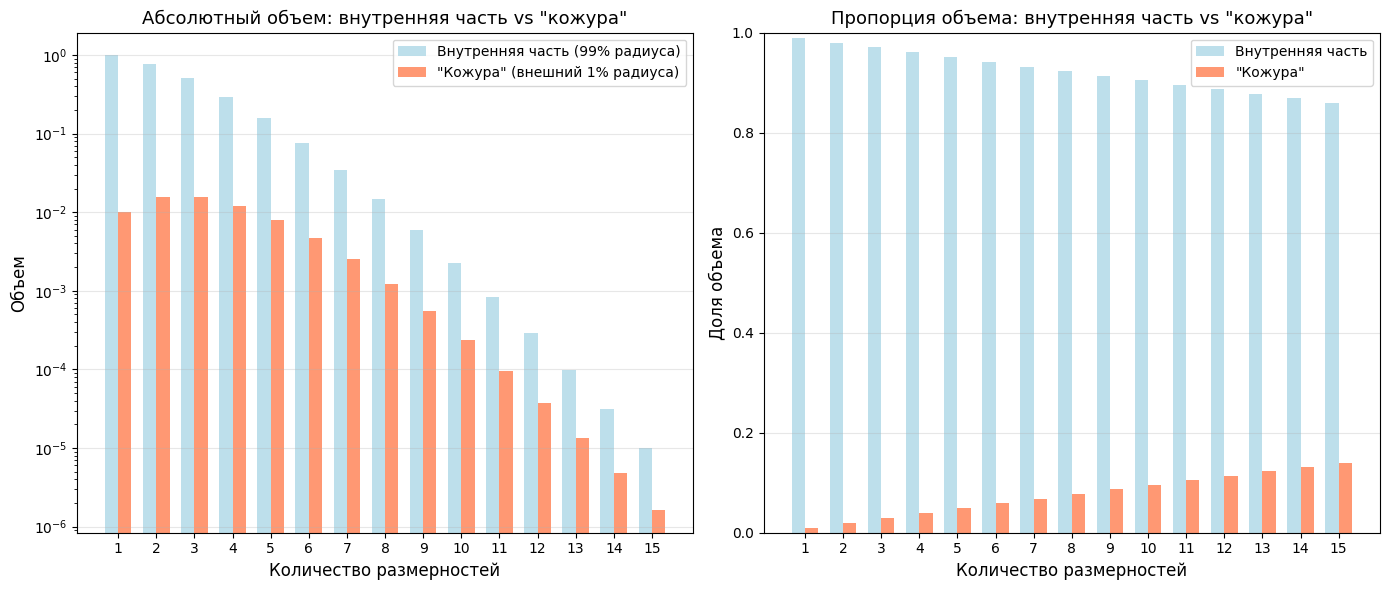

Левая панель: абсолютные объемы (в логарифмическом масштабе)
Правая панель: пропорции - видно, как "кожура" занимает всё больше объема!


In [12]:
# Визуализация 4: Сравнение объемов в "кожуре" для разных размерностей
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Левая панель: объемы
dim_range = np.arange(1, 16)
volumes_full = [volume_of_hypersphere(1.0, d) for d in dim_range]
volumes_inner = [volume_of_hypersphere(0.99, d) for d in dim_range]
volumes_shell = [v_full - v_inner for v_full, v_inner in zip(volumes_full, volumes_inner)]

x_pos = np.arange(len(dim_range))
width = 0.35

ax1.bar(x_pos - width/2, volumes_inner, width, label='Внутренняя часть (99% радиуса)', 
        color='lightblue', alpha=0.8)
ax1.bar(x_pos + width/2, volumes_shell, width, label='\"Кожура\" (внешний 1% радиуса)', 
        color='coral', alpha=0.8)
ax1.set_xlabel('Количество размерностей', fontsize=12)
ax1.set_ylabel('Объем', fontsize=12)
ax1.set_title('Абсолютный объем: внутренняя часть vs \"кожура\"', fontsize=13)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(dim_range)
ax1.legend(fontsize=10)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')

# Правая панель: пропорции
shell_props = [get_prop_of_volume_in_outer_1_percent(d) for d in dim_range]
inner_props = [1 - p for p in shell_props]

ax2.bar(x_pos - width/2, inner_props, width, label='Внутренняя часть', 
        color='lightblue', alpha=0.8)
ax2.bar(x_pos + width/2, shell_props, width, label='\"Кожура\"', 
        color='coral', alpha=0.8)
ax2.set_xlabel('Количество размерностей', fontsize=12)
ax2.set_ylabel('Доля объема', fontsize=12)
ax2.set_title('Пропорция объема: внутренняя часть vs \"кожура\"', fontsize=13)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(dim_range)
ax2.legend(fontsize=10)
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Левая панель: абсолютные объемы (в логарифмическом масштабе)")
print("Правая панель: пропорции - видно, как \"кожура\" занимает всё больше объема!")


## Объяснение концепта "кожуры"

**"Кожура" (shell)** - это внешний слой гиперсферы, в данном случае определяемый как внешний 1% радиуса.

В низких размерностях (1D, 2D, 3D) большая часть объема сосредоточена в центре, и "кожура" содержит лишь малую долю объема. Однако с увеличением размерности ситуация кардинально меняется:

- **В 2D**: только ~2% объема в "кожуре"
- **В 50D**: уже ~40% объема в "кожуре"  
- **В 300D**: более 95% объема находится в "кожуре"!

Это парадоксальное свойство высокомерных пространств - почти весь "объем" гиперсферы концентрируется в очень тонком внешнем слое. Аналогия: представьте апельсин, у которого почти вся мякоть находится в кожуре!


In [8]:
# Вычисляем долю объема во внешнем 1% радиуса для различных размерностей
# С увеличением размерности эта доля стремится к 1 (почти весь объем в "кожуре")
for c_dim in [1, 2, 10, 20, 50, 100, 150, 200, 250, 300]:
    print(
        "Доля объема во внешнем 1%% радиуса в %d размерностях = %3.3f"
        % (c_dim, get_prop_of_volume_in_outer_1_percent(c_dim))
    )

Доля объема во внешнем 1% радиуса в 1 размерностях = 0.010
Доля объема во внешнем 1% радиуса в 2 размерностях = 0.020
Доля объема во внешнем 1% радиуса в 10 размерностях = 0.096
Доля объема во внешнем 1% радиуса в 20 размерностях = 0.182
Доля объема во внешнем 1% радиуса в 50 размерностях = 0.395
Доля объема во внешнем 1% радиуса в 100 размерностях = 0.634
Доля объема во внешнем 1% радиуса в 150 размерностях = 0.779
Доля объема во внешнем 1% радиуса в 200 размерностях = 0.866
Доля объема во внешнем 1% радиуса в 250 размерностях = 0.919
Доля объема во внешнем 1% радиуса в 300 размерностях = 0.951


You should see that by the time we get to 300 dimensions most of the volume is in the outer 1 percent. <br><br>

The conclusion of all of this is that in high dimensions you should be sceptical of your intuitions about how things work.  I have tried to visualize many things in one or two dimensions in the book, but you should also be sceptical about these visualizations!